# NBA Players Through the Years

This is a Data Science Project that will analyze players through the years from 1996 to 2019. The data used for the project is from the [NBA Players Dataset](https://www.kaggle.com/datasets/justinas/nba-players-data) by Justinas Cirtutas found on Kaggle.

### Import Libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from utils.scraper import load_dict

### Loading the Raw Data

In [2]:
raw_df = pd.read_csv('player_info.csv', index_col=False)

### Cleaning the Raw Data

The raw data had to be cleaned and properly formatted.

To begin, I thought it would be useful to do some data analysis on the position of a player. However, I observed that the player positions are not included in the raw dataset. As such, I wrote a web scraping script that scraped data from the [Basketball Reference](https://www.basketball-reference.com/) website to get the positions of each NBA player in NBA history. The output of the scraping process is a dictionary mapping from names to positions, stored in a file called `names_to_positions.txt`. The scraping code is in `scraper.py`. 

Next, I mapped each player's name to their position using by creating a dictionary. The players' positions are added in a new column of the raw data frame. There was an issue, however, since many of the positions were `NaN`. As such, I investigated the raw data to find that there were many mismatches between the scraped names and the raw data names. To solve this, I wrote `data_cleaner.py` which removed accents from names and converted all scraped names to match those of the raw data. In particular, `name_mapping.txt` contains a name-to-name dictionary mapping that will be used to replace all scraped names with the names in the raw data. 

After this step, I discovered that many players in the raw data had many name alternatives. For instance, the player Marcus Morris appeared as both *Marcus Morris* and *Marcus Morris Sr.*. As such, `data_cleaner.py` also has a function that adds all the alternative names for such players.

### Preprocessing the Data

In [3]:
def add_positions(raw_df, names_to_positions):
    """Adds positions for each player in the data frame"""
    raw_df['positions'] = raw_df['player_name'].map(names_to_positions)
    return raw_df

In [27]:
def rename_columns(df, old_names: list, new_names: list):
    """Replace column names. Names in old names list are 
    element-wise paired with new names list."""
    column_names = dict(zip(old_names, new_names))
    return df.rename(columns=column_names)

In [22]:
fn = 'files/names_to_positions.txt'
# dictionary mapping from names to positions
names_to_positions = load_dict(fn)

df = add_positions(raw_df, names_to_positions)

In [25]:
df = df.drop('Unnamed: 0', axis=1)

In [29]:
old_names = list(df.columns)
new_names = ['name', 'team', 'age', 'height', 'weight', 'college', 
             'country', 'draft_year', 'draft_round', 'draft_number', 
             'games_played', 'avg_pts', 'avg_rebs', 'avg_asts', 'pt_diff', 
             'off_rebs', 'def_rebs', 'usg_pct', 'ts_pct', 'ast_pct',
             'season', 'position']
df = rename_columns(df, old_names, new_names)

We cleaned up the column names to make them more semantically meaningful. We clarify the meanings of the following column names below:
* `height` - height (in cm)
* `weight` - weight (in kg)
* `team` - team at the end of the season
* `country` - country of birth
* `pt_diff` - points player's team scores minus points opponent scores per 100 possessions
* `off_rebs`/`def_rebs` - percentage of offensive/defensive rebounds grabbed while on floor
* `ast_pct` - percentage of teammates' field goals player assisted
* `ts_pct` - true shooting percentage which is computed by calculating *(points scored / field goal attempts + (0.44 x free throw attempts)*

In [30]:
df

,name,team,age,height,weight,college,country,draft_year,draft_round,draft_number,...,avg_rebs,avg_asts,pt_diff,off_rebs,def_rebs,usg_pct,ts_pct,ast_pct,season,position
0,Travis Knight,LAL,22.0,213.36,106.594120,Connecticut,USA,1996,1,29,...,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97,C
1,Matt Fish,MIA,27.0,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,50,...,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97,C
2,Matt Bullard,HOU,30.0,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,Undrafted,...,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97,F
3,Marty Conlon,BOS,29.0,210.82,111.130040,Providence,USA,Undrafted,Undrafted,Undrafted,...,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97,F-C
4,Martin Muursepp,DAL,22.0,205.74,106.594120,None,USA,1996,1,25,...,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,Matthew Dellavedova,CLE,30.0,190.50,90.718400,St.Mary's College of California,Australia,Undrafted,Undrafted,Undrafted,...,1.8,4.5,-3.1,0.029,0.085,0.125,0.312,0.337,2020-21,G
11696,Maurice Harkless,SAC,28.0,200.66,99.790240,St. John's,USA,2012,1,15,...,2.4,1.2,-2.9,0.017,0.097,0.114,0.527,0.071,2020-21,F-G
11697,Max Strus,MIA,25.0,195.58,97.522280,DePaul,USA,Undrafted,Undrafted,Undrafted,...,1.1,0.6,-4.2,0.011,0.073,0.179,0.597,0.074,2020-21,G
11698,Marcus Morris Sr.,LAC,31.0,203.20,98.883056,Kansas,USA,2011,1,14,...,4.1,1.0,4.2,0.025,0.133,0.194,0.614,0.056,2020-21,F


### Exploratory Data Analysis

Here, we want to explore the data to get a sense of the structure and content. 

In [31]:
df.head()

,name,team,age,height,weight,college,country,draft_year,draft_round,draft_number,...,avg_rebs,avg_asts,pt_diff,off_rebs,def_rebs,usg_pct,ts_pct,ast_pct,season,position
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,...,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97,C
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,...,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97,C
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,...,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97,F
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,...,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97,F-C
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,...,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97,F


In [33]:
if len(df[df.position.isna()]) == 0: 
    print("Great! All players have a corresponding position.")
else:
    print("The following players below do not have a corresponding position:")
    print(list(df[df.position.isna()].player_name))

Great! All players have a corresponding position.


Perfect! The above tells us that there are no players that do not have a position attached to them. In other words, every player in our data frame has a position.

In [36]:
# gets column names, number of non-null count, and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          11700 non-null  object 
 1   team          11700 non-null  object 
 2   age           11700 non-null  float64
 3   height        11700 non-null  float64
 4   weight        11700 non-null  float64
 5   college       11700 non-null  object 
 6   country       11700 non-null  object 
 7   draft_year    11700 non-null  object 
 8   draft_round   11700 non-null  object 
 9   draft_number  11700 non-null  object 
 10  games_played  11700 non-null  int64  
 11  avg_pts       11700 non-null  float64
 12  avg_rebs      11700 non-null  float64
 13  avg_asts      11700 non-null  float64
 14  pt_diff       11700 non-null  float64
 15  off_rebs      11700 non-null  float64
 16  def_rebs      11700 non-null  float64
 17  usg_pct       11700 non-null  float64
 18  ts_pct        11700 non-nu

In [37]:
df.shape

(11700, 22)

Great! We have 22 total columns and 17,000 observations in total. Also, our dataset is perfectly clean, namely there are no missing values for any of the variables.

In [38]:
# gets dimension of object (data frame)
df.ndim

2

In [39]:
df.describe()

,age,height,weight,games_played,avg_pts,avg_rebs,avg_asts,pt_diff,off_rebs,def_rebs,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,27.131966,200.728501,100.526791,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,4.340006,9.169827,12.526481,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,26.000000,200.660000,99.790240,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,30.000000,208.280000,108.862080,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


The above a gets statistical summary for numerical columns. Several observations:
1. The average player age is 27. Not too surprising.
2. The average player height is 200.72 cm or about 6'7''. Not too surprising. However, the tallest player was 7'7''...that's very tall!
3. The average number of games played is about 51 to 52 games. A season has 82 games in total. Is this due to injuries or players needing rest? Also, how come the maximum games played is 85? 

These are just preliminary insights. More insights can be drawn from univariate distribution visualizations.

In [40]:
df.describe(include=['O'])

,name,team,college,country,draft_year,draft_round,draft_number,season,position
count,11700,11700,11700,11700,11700,11700,11700,11700,11700
unique,2333,36,336,79,46,9,76,25,7
top,Vince Carter,CLE,None,USA,Undrafted,1,Undrafted,2020-21,G
freq,22,411,1715,9836,2057,6792,2096,540,4049


The above gets a statistical summary for categorial variables. Several observations:
1. Vince Carter has played 22 seasons, the most of any player in the dataset. Dedicated veteran who still got the juice!
2. The most common college is...no college at all. Is this actually the case?
3. Most NBA players were undrafted.
4. The most common position in this dataset is G.

Let's get some answers to the previous questions.

In [43]:
df[df.games_played == df.games_played.max()][['name', 'season', 'games_played']]

,name,season,games_played
1725,Chris Gatling,1999-00,85
3191,Shareef Abdur-Rahim,2003-04,85
3236,Theo Ratliff,2003-04,85


These three players have played 85 games in a season. The explanation behind this is that these players have changed teams in a season, making them play more than the 82 game standard which is the total number of games *for a given team*.

In [45]:
df[df.height == df.height.max()][['name', 'season', 'height']]

,name,season,height
357,Gheorghe Muresan,1996-97,231.14
953,Gheorghe Muresan,1998-99,231.14
1657,Gheorghe Muresan,1999-00,231.14


Tallest player was Gheorghe Muresan at 7'7''.

In [49]:
df[df.weight == df.weight.max()][['name', 'season', 'weight']]

,name,season,weight
8428,Sim Bhullar,2014-15,163.29312


Heaviest player was Sim Bhullar, who weighed 359 lbs.

In [59]:
df[df.college == 'None'].iloc[0:4, :]

,name,team,age,height,weight,college,country,draft_year,draft_round,draft_number,...,avg_rebs,avg_asts,pt_diff,off_rebs,def_rebs,usg_pct,ts_pct,ast_pct,season,position
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,...,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97,F
13,Mark Bradtke,PHI,28.0,208.28,120.20188,None,USA,Undrafted,Undrafted,Undrafted,...,1.9,0.2,0.9,0.107,0.176,0.118,0.463,0.043,1996-97,C-F
96,Kobe Bryant,LAL,18.0,200.66,90.71840,None,USA,1996,1,13,...,1.9,1.3,2.2,0.048,0.084,0.244,0.544,0.144,1996-97,G-F
101,Kevin Garnett,MIN,21.0,210.82,99.79024,None,USA,1995,1,5,...,8.0,3.1,2.8,0.077,0.166,0.215,0.537,0.139,1996-97,F-C


Indeed, we can see that players with a college value of `None` include Kevin Garnett and Kobe Bryant who did not go to college. This validates our observation that players with no college listed did not attend college and went directly to the NBA. 

In [61]:
df.memory_usage()

Index             128
name            93600
team            93600
age             93600
height          93600
weight          93600
college         93600
country         93600
draft_year      93600
draft_round     93600
draft_number    93600
games_played    93600
avg_pts         93600
avg_rebs        93600
avg_asts        93600
pt_diff         93600
off_rebs        93600
def_rebs        93600
usg_pct         93600
ts_pct          93600
ast_pct         93600
season          93600
position        93600
dtype: int64

In [64]:
df.duplicated().sum()

0

There are no duplicate rows in this dataset.

### Data Exploration

The first question we will explore is the distribution of the birth country of players.

In [68]:
df['country'].value_counts()

USA                    9836
France                  167
Canada                  161
Brazil                   83
Australia                83
                       ... 
USSR                      2
Ghana                     1
Trinidad and Tobago       1
Sudan (UK)                1
Guinea                    1
Name: country, Length: 79, dtype: int64

Let's plot the distribution in a bar plot. Before doing so, we will filter out the countries with 30 or more players.

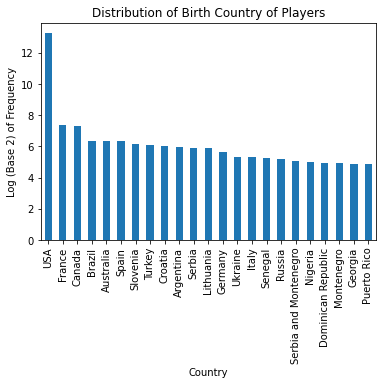

In [95]:
countries = df['country'].value_counts()
# filter for countries with 30 or players
countries = countries[countries >= 30]
# log normalize by taking log of each value in series
countries = countries.apply(np.log2).plot(kind='bar')
plt.title('Distribution of Birth Country of Players')
plt.ylabel('Log (Base 2) of Frequency')
plt.xlabel('Country')
plt.show()